# day 03: Intro to DL with PyTorch

*special thanks to YSDA team for provided materials*

What comes today:
- Introduction to PyTorch
- Automatic gradient computation
- Logistic regression (it's a neural network, actually ;) )

![img](https://pytorch.org/tutorials/_static/pytorch-logo-dark.svg)

__This notebook__ will teach you to use pytorch low-level core. You can install it [here](http://pytorch.org/).

__Pytorch feels__ differently than other frameworks (like tensorflow/theano) on almost every level. TensorFlow makes your code live in two "worlds" simultaneously:  symbolic graphs and actual tensors. First you declare a symbolic "recipe" of how to get from inputs to outputs, then feed it with actual minibatches of data.  In pytorch, __there's only one world__: all tensors have a numeric value.

You compute outputs on the fly without pre-declaring anything. The code looks exactly as in pure numpy with one exception: pytorch computes gradients for you. And can run stuff on GPU. And has a number of pre-implemented building blocks for your neural nets. [And a few more things.](https://medium.com/towards-data-science/pytorch-vs-tensorflow-spotting-the-difference-25c75777377b)

Let's dive into it!

In [6]:
import numpy as np
import torch
print(torch.__version__)

1.9.0+cu111


In [30]:
# numpy world

x = np.arange(16).reshape(4,4)

print("X :\n%s\n" % x)
print("X.shape : %s\n" % (x.shape,))
print("add 5 :\n%s\n" % (x + 5))
print("X*X^T  :\n%s\n" % np.dot(x,x.T))
print("mean over cols :\n%s\n" % (x.mean(axis=-1)))
print("cumsum of cols :\n%s\n" % (np.cumsum(x,axis=0)))

X :
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

X.shape : (4, 4)

add 5 :
[[ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]

X*X^T  :
[[ 14  38  62  86]
 [ 38 126 214 302]
 [ 62 214 366 518]
 [ 86 302 518 734]]

mean over cols :
[ 1.5  5.5  9.5 13.5]

cumsum of cols :
[[ 0  1  2  3]
 [ 4  6  8 10]
 [12 15 18 21]
 [24 28 32 36]]



In [31]:
# pytorch world

x = np.arange(16).reshape(4,4)

x = torch.tensor(x, dtype=torch.float32) #or torch.arange(0,16).view(4,4)

print ("X :\n%s" % x)
print("X.shape : %s\n" % (x.shape,))
print ("add 5 :\n%s" % (x + 5))
print ("X*X^T  :\n%s" % torch.matmul(x,x.transpose(1,0)))  #short: x.mm(x.t())
print ("mean over cols :\n%s" % torch.mean(x,dim=-1))
print ("cumsum of cols :\n%s" % torch.cumsum(x,dim=0))

X :
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])
X.shape : torch.Size([4, 4])

add 5 :
tensor([[ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.],
        [13., 14., 15., 16.],
        [17., 18., 19., 20.]])
X*X^T  :
tensor([[ 14.,  38.,  62.,  86.],
        [ 38., 126., 214., 302.],
        [ 62., 214., 366., 518.],
        [ 86., 302., 518., 734.]])
mean over cols :
tensor([ 1.5000,  5.5000,  9.5000, 13.5000])
cumsum of cols :
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.]])


#### NumPy and Pytorch

As you can notice, pytorch allows you to hack stuff much the same way you did with numpy. This means that you can _see the numeric value of any tensor at any moment of time_. Debugging such code can be done with by printing tensors or using any debug tool you want (e.g. [gdb](https://wiki.python.org/moin/DebuggingWithGdb)).

You could also notice the a few new method names and a different API. So no, there's no compatibility with numpy [yet](https://github.com/pytorch/pytorch/issues/2228) and yes, you'll have to memorize all the names again. Get excited!

![img](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT2R7-3j6dzcu8uvD0MoNVO9KSmKVRrYJ4hTThAhuvbPo0Q6Lws)

For example, 
* If something takes a list/tuple of axes in numpy, you can expect it to take *args in pytorch
 * `x.reshape([1,2,8]) -> x.view(1,2,8)`
* You should swap _axis_ for _dim_ in operations like mean or cumsum
 * `x.sum(axis=-1) -> x.sum(dim=-1)`
* most mathematical operations are the same, but types an shaping is different
 * `x.astype('int64') -> x.type(torch.LongTensor)`

To help you acclimatize, there's a [table](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users) covering most new things. There's also a neat [documentation page](http://pytorch.org/docs/master/).

Finally, if you're stuck with a technical problem, we recommend searching [pytorch forumns](https://discuss.pytorch.org/). Or just googling, which usually works just as efficiently. 

If you feel like you almost give up, remember two things: __GPU__ and __free gradients__. Besides you can always jump back to numpy with x.numpy()

### Warmup: trigonometric knotwork
_inspired by [this post](https://www.quora.com/What-are-the-most-interesting-equation-plots)_

There are some simple mathematical functions with cool plots. For one, consider this:

$$ x(t) = t - 1.5 * cos( 15 t) $$
$$ y(t) = t - 1.5 * sin( 16 t) $$


In [10]:
import matplotlib.pyplot as plt

In [34]:
t = torch.linspace(-10, 10, steps = 10000)

# compute x(t) and y(t) as defined above
# x = <your_code_here>
# y = <your_code_here>

# plt.plot(x.numpy(), y.numpy())

if you're done early, try adjusting the formula and seing how  it affects the function

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```


## Automatic gradients

Any self-respecting DL framework must do your backprop for you. Torch handles this with the `autograd` module.

The general pipeline looks like this:
* When creating a tensor, you mark it as `requires_grad`:
    * __```torch.zeros(5, requires_grad=True)```__
    * torch.tensor(np.arange(5), dtype=torch.float32, requires_grad=True)
* Define some differentiable `loss = arbitrary_function(a)`
* Call `loss.backward()`
* Gradients are now available as ```a.grads```

__Here's an example:__ let's fit a linear regression on Boston house prices

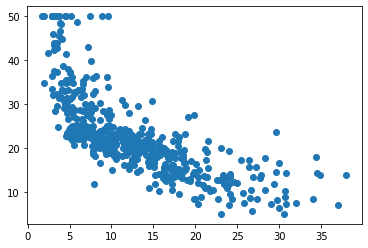

In [35]:
from sklearn.datasets import load_boston

boston = load_boston()
plt.scatter(boston.data[:, -1], boston.target) # берем последнюю фичу и один ответ
# обучим один оэффициент (линейное обучение)

In [36]:
# from torch.autograd import Variable
w = torch.zeros(1, requires_grad=True) # weight
b = torch.zeros(1, requires_grad=True) # bias свободный член
# requires_grad - созданий граф вычислений

x = torch.tensor(boston.data[:,-1] / 10, dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

In [37]:
# у переменных появилось поле .grad
print("dL/dw = {}\n".format(w.grad))
print("dL/db = {}\n".format(b.grad))

dL/dw = None

dL/db = None



In [38]:
# forward prop
y_pred = w * x + b
loss = torch.mean( (y_pred - y)**2 ) # mean значение объекта или среднеквадратичная ошибка (MSE)

# backward prop ошибку из лоса передаем во все веса
# propagete gradients
loss.backward()
# из тензора представляемого числом можно вызвать функцию backward
# дай градиент для уменьшения целевой функции

The gradients are now stored in `.grad` of those variables that require them.

In [39]:
print("dL/dw = {}\n".format(w.grad))
print("dL/db = {}\n".format(b.grad)) # 1 признак => вектор из одного признака

dL/dw = tensor([-47.3514])

dL/db = tensor([-45.0656])



If you compute gradient from multiple losses, the gradients will add up at variables, therefore it's useful to __zero the gradients__ between iteratons.

In [40]:
losses = []

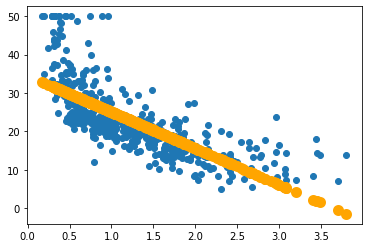

loss =  38.482975


In [41]:
from IPython.display import clear_output

for i in range(500):

    # forward
    y_pred = w * x  + b
    loss = torch.mean( (y_pred - y)**2 )
    losses.append(loss.item())
    
    # backward
    loss.backward()

    # update градиентный спуск (обнвляем наши веса)
    w.data -= 0.05 * w.grad.data
    b.data -= 0.05 * b.grad.data
    
    # zero gradients сделали шаг градиентного спуска, градиенты занулили
    w.grad.data.zero_()
    b.grad.data.zero_()
    
    # the rest of code is just bells and whistles
    if (i+1)%5==0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(), color='orange', linewidth=5)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.5:
            print("Done!")
            break

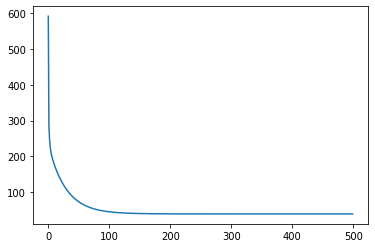

In [42]:
plt.plot(losses)

__Quest__: try implementing and writing some nonlinear regression. You can try quadratic features or some trigonometry, or a simple neural network. The only difference is that now you have more variables and a more complicated `y_pred`. 

**Remember!**
![img](https://media.giphy.com/media/3o751UMCYtSrRAFRFC/giphy.gif)

When dealing with more complex stuff like neural network, it's best if you use tensors the way samurai uses his sword. 


# High-level pytorch

So far we've been dealing with low-level torch API. While it's absolutely vital for any custom losses or layers, building large neura nets in it is a bit clumsy.

Luckily, there's also a high-level torch interface with a pre-defined layers, activations and training algorithms. 

We'll cover them as we go through a simple image recognition problem: classifying letters into __"A"__ vs __"B"__.


In [7]:
import sys,os
if 'google.colab' in sys.modules and not os.path.exists('.setup_complete'):
    !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/spring20/week04_%5Brecap%5D_deep_learning/notmnist.py

    !touch .setup_complete

In [8]:
from notmnist import load_notmnist
X_train, y_train, X_test, y_test = load_notmnist(letters='AB')
X_train, X_test = X_train.reshape([-1, 784]), X_test.reshape([-1, 784])

print("Train size = %i, test_size = %i"%(len(X_train),len(X_test)))

Extracting ...
Parsing...
found broken img: ./notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
Done
Train size = 2808, test_size = 937


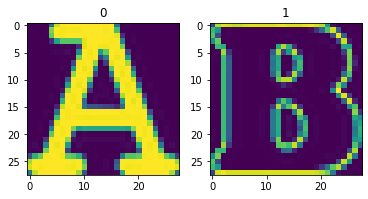

In [11]:
for i in [0,1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(X_train[i].reshape([28,28]))
    plt.title(str(y_train[i]))

Let's start with layers. The main abstraction here is __`torch.nn.Module`__

In [4]:
from torch import nn
import torch.nn.functional as F

print(nn.Module.__doc__)

Base class for all neural network modules.

    Your models should also subclass this class.

    Modules can also contain other Modules, allowing to nest them in
    a tree structure. You can assign the submodules as regular attributes::

        import torch.nn as nn
        import torch.nn.functional as F

        class Model(nn.Module):
            def __init__(self):
                super(Model, self).__init__()
                self.conv1 = nn.Conv2d(1, 20, 5)
                self.conv2 = nn.Conv2d(20, 20, 5)

            def forward(self, x):
                x = F.relu(self.conv1(x))
                return F.relu(self.conv2(x))

    Submodules assigned in this way will be registered, and will have their
    parameters converted too when you call :meth:`to`, etc.

    :ivar training: Boolean represents whether this module is in training or
                    evaluation mode.
    :vartype training: bool
    


In [12]:
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)
        self.loss = nn.BCELoss()

    def forward(self, x):
        x = F.relu(self.conv1(x)) # фичи, активация
        return F.relu(self.conv2(x))

model = Model()
x = X_train[0].reshape(1, 1, 28, 28)
x = torch.from_numpy(x)
model(x)

tensor([[[[0.1608, 0.2839, 0.3081,  ..., 0.1324, 0.1892, 0.1943],
          [0.0483, 0.1480, 0.2089,  ..., 0.1092, 0.1620, 0.1970],
          [0.0582, 0.0179, 0.0000,  ..., 0.1049, 0.1465, 0.1973],
          ...,
          [0.0803, 0.0762, 0.0000,  ..., 0.1943, 0.0000, 0.0000],
          [0.1174, 0.0000, 0.0000,  ..., 0.1621, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0351, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.2815, 0.3946, 0.3445,  ..., 0.1132, 0.2221, 0.3387],
          [0.3571, 0.2432, 0.2967,  ..., 0.1134, 0.2686, 0.2361],
          [0.3095, 0.2961, 0.4450,  ..., 0.0000, 0.2654, 0.3084]],

         [[0.0000, 0.0000, 0.0016,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.1007, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0861,  ..., 0

In [ ]:
list(model.named_parameters())

There's a vast library of popular layers and architectures already built for ya'.

This is a binary classification problem, so we'll train a __Logistic Regression with sigmoid__.
$$P(y_i | X_i) = \sigma(W \cdot X_i + b) ={ 1 \over {1+e^{- [W \cdot X_i + b]}} }$$


In [13]:
# create a network that stacks layers on top of each other
model = nn.Sequential()

# add first "dense" layer with 784 input units and 1 output unit. 
model.add_module('l1', nn.Linear(784, 1))

# add softmax activation for probabilities. Normalize over axis 1
# note: layer names must be unique
model.add_module('l2', nn.Sigmoid())

In [14]:
print("Weight shapes:", [w.shape for w in model.parameters()])
# параметры из nn.Linear(784, 1)

Weight shapes: [torch.Size([1, 784]), torch.Size([1])]


In [15]:
# create dummy data with 3 samples and 784 features
# из numpy в pytorch
x = torch.tensor(X_train[:3], dtype=torch.float32)
y = torch.tensor(y_train[:3], dtype=torch.float32)

# compute outputs given inputs, both are variables
y_predicted = model(x) # __call__->forward

y_predicted # display what we've got

tensor([[0.4545],
        [0.4796],
        [0.6140]], grad_fn=<SigmoidBackward>)

Let's now define a loss function for our model.

The natural choice is to use binary crossentropy (aka logloss, negative llh):
$$ L = {1 \over N} \underset{X_i,y_i} \sum - [  y_i \cdot log P(y_i | X_i) + (1-y_i) \cdot log (1-P(y_i | X_i)) ]$$



In [16]:
y.shape, y_predicted.shape # сравнили shape совпадают

(torch.Size([3]), torch.Size([3, 1]))

In [17]:
y_predicted[:, 0]

tensor([0.4545, 0.4796, 0.6140], grad_fn=<SelectBackward>)

In [24]:
crossentropy = F.binary_cross_entropy(y_predicted[:, 0], y, reduction='none') ### YOUR CODE
# считаем ошибку
# y_predicted - предсказанные метки
# y - истинные метки
loss = torch.mean(crossentropy, dim=0, keepdims=True) ### YOUR CODE усредняем ошибку


assert tuple(crossentropy.size()) == (3,), "Crossentropy must be a vector with element per sample"
assert tuple(loss.size()) == (1,), "Loss must be scalar. Did you forget the mean/sum?"
assert loss.data.numpy()[0] > 0, "Crossentropy must non-negative, zero only for perfect prediction"
assert loss.data.numpy()[0] <= np.log(3), "Loss is too large even for untrained model. Please double-check it."

__Note:__ you can also find many such functions in `torch.nn.functional`, just type __`F.<tab>`__.

__Torch optimizers__

When we trained Linear Regression above, we had to manually .zero_() gradients on both our variables. Imagine that code for a 50-layer network.

Again, to keep it from getting dirty, there's `torch.optim` module with pre-implemented algorithms:

In [25]:
opt = torch.optim.SGD(model.parameters(), lr=0.01)
# model.parameters() веса которые хотим чтобы контролировал
# here's how it's used:
opt.zero_grad()      # clear gradients
loss.backward()      # add new gradients
opt.step()           # change weights
# read gradient accumulation steps

In [ ]:
# dispose of old variables to avoid bugs later
del x, y, y_predicted, loss, y_pred

### Putting it all together

In [29]:
# create network again just in case
model = nn.Sequential(nn.Linear(784, 1), nn.Sigmoid())

opt = torch.optim.Adam(model.parameters(), lr=1e-3)

In [35]:
history = []

for i in range(100):
    
    # sample 256 random images
    ix = np.random.randint(0, len(X_train), 256) # берем случайные индексы для формирования бача
    x_batch = torch.tensor(X_train[ix], dtype=torch.float32)
    y_batch = torch.tensor(y_train[ix], dtype=torch.float32)
    
    # predict probabilities (forward prob)
    y_predicted = model(x_batch)[:, 0]
    
    assert y_predicted.dim() == 1, "did you forget to select first column with [:, 0]"
    
    # compute loss, just like before
    crossentropy = F.binary_cross_entropy(y_predicted, y_batch, reduction='none') ### YOUR CODE

    loss = torch.mean(crossentropy, dim=0, keepdims=True) ### YOUR CODE
    
    # compute gradients
    loss.backward()
    
    # Adam step
    opt.step()
    
    # clear gradients
    opt.zero_grad()
    
    # сохраняем в питон и забываем предыдущий граф
    history.append(loss.item()) # у тензора размера 1 есть метод item ->  float
    
    
    if i % 10 == 0:
        print("step #%i | mean loss = %.3f" % (i, np.mean(history[-10:])))

step #0 | mean loss = 0.077
step #10 | mean loss = 0.076
step #20 | mean loss = 0.074
step #30 | mean loss = 0.068
step #40 | mean loss = 0.065
step #50 | mean loss = 0.069
step #60 | mean loss = 0.061
step #70 | mean loss = 0.071
step #80 | mean loss = 0.068
step #90 | mean loss = 0.072


In [32]:
x_batch.shape # [batch_size, features]

torch.Size([256, 784])

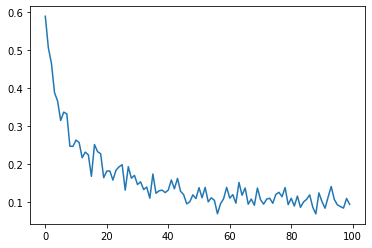

In [33]:
plt.plot(history)

__Debugging tips:__
* make sure your model predicts probabilities correctly. Just print them and see what's inside.
* don't forget _minus_ sign in the loss function! It's a mistake 99% ppl do at some point.
* make sure you zero-out gradients after each step. Srsly:)
* In general, pytorch's error messages are quite helpful, read 'em before you google 'em.
* if you see nan/inf, print what happens at each iteration to find our where exactly it occurs.
  * If loss goes down and then turns nan midway through, try smaller learning rate. (Our current loss formula is unstable).


### Evaluation

Let's see how our model performs on test data

In [ ]:
# use your model to predict classes (0 or 1) for all test samples
predicted_y_test = ### YOUR CODE
predicted_y_test = np.array(predicted_y_test > 0.5)
         
assert isinstance(predicted_y_test, np.ndarray), "please return np array, not %s" % type(predicted_y_test)
assert predicted_y_test.shape == y_test.shape, "please predict one class for each test sample"
assert np.in1d(predicted_y_test, y_test).all(), "please predict class indexes"

accuracy = np.mean(predicted_y_test == y_test)

print("Test accuracy: %.5f" % accuracy)
assert accuracy > 0.95, "try training longer"

print('Great job!')

### Bonus area:

### The game of life (0.4 points)

Now it's time for you to make something more challenging. We'll implement Conway's [Game of Life](http://web.stanford.edu/~cdebs/GameOfLife/) in _pure pytorch_. 

While this is still a toy task, implementing game of life this way has one cool benefit: __you'll be able to run it on GPU! __ Indeed, what could be a better use of your gpu than simulating game of life on 1M/1M grids?

![img](https://cdn.tutsplus.com/gamedev/authors/legacy/Stephane%20Beniak/2012/09/11/Preview_Image.png)
If you've skipped the url above out of sloth, here's the game of life:
* You have a 2D grid of cells, where each cell is "alive"(1) or "dead"(0)
* Any living cell that has 2 or 3 neighbors survives, else it dies [0,1 or 4+ neighbors]
* Any cell with exactly 3 neighbors becomes alive (if it was dead)

For this task, you are given a reference numpy implementation that you must convert to pytorch.
_[numpy code inspired by: https://github.com/rougier/numpy-100]_


__Note:__ You can find convolution in `torch.nn.functional.conv2d(Z,filters)`. Note that it has a different input format.

__Note 2:__ From the mathematical standpoint, pytorch convolution is actually cross-correlation. Those two are very similar operations. More info: [video tutorial](https://www.youtube.com/watch?v=C3EEy8adxvc), [scipy functions review](http://programmerz.ru/questions/26903/2d-convolution-in-python-similar-to-matlabs-conv2-question), [stack overflow source](https://stackoverflow.com/questions/31139977/comparing-matlabs-conv2-with-scipys-convolve2d).

In [ ]:
from scipy.signal import correlate2d

def np_update(Z):
    # Count neighbours with convolution
    filters = np.array([[1, 1, 1],
                        [1, 0, 1],
                        [1, 1, 1]])

    N = correlate2d(Z, filters, mode='same')

    # Apply rules
    birth = (N == 3) & (Z == 0)
    survive = ((N == 2) | (N == 3)) & (Z == 1)

    Z[:] = birth | survive
    return Z

In [ ]:
def torch_update(Z):
    """
    Implement an update function that does to Z exactly the same as np_update.
    :param Z: torch.FloatTensor of shape [height,width] containing 0s(dead) an 1s(alive)
    :returns: torch.FloatTensor Z after updates.

    You can opt to create new tensor or change Z inplace.
    """

    # <Your code here!>

    return Z

In [ ]:
# initial frame
Z_numpy = np.random.choice([0, 1], p=(0.5, 0.5), size=(100, 100))
Z = torch.from_numpy(Z_numpy).type(torch.FloatTensor)

# your debug polygon :)
Z_new = torch_update(Z.clone())

# tests
Z_reference = np_update(Z_numpy.copy())
assert np.all(Z_new.numpy(
) == Z_reference), "your pytorch implementation doesn't match np_update. Look into Z and np_update(ZZ) to investigate."
print("Well done!")

In [ ]:
%matplotlib notebook
plt.ion()

# initialize game field
Z = np.random.choice([0, 1], size=(100, 100))
Z = torch.from_numpy(Z).type(torch.FloatTensor)

fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

for _ in range(100):

    # update
    Z = torch_update(Z)

    # re-draw image
    ax.clear()
    ax.imshow(Z.numpy(), cmap='gray')
    fig.canvas.draw()

In [ ]:
# Some fun setups for your amusement

# parallel stripes
Z = np.arange(100) % 2 + np.zeros([100, 100])
# with a small imperfection
Z[48:52, 50] = 1

Z = torch.from_numpy(Z).type(torch.FloatTensor)

fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

for _ in range(100):
    Z = torch_update(Z)
    ax.clear()
    ax.imshow(Z.numpy(), cmap='gray')
    fig.canvas.draw()

More fun with Game of Life: [video](https://www.youtube.com/watch?v=C2vgICfQawE)

```

```

```

```

```

```

```

```

```

```
### More about pytorch:
* Using torch on GPU and multi-GPU - [link](http://pytorch.org/docs/master/notes/cuda.html)
* More tutorials on pytorch - [link](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* Pytorch examples - a repo that implements many cool DL models in pytorch - [link](https://github.com/pytorch/examples)
* Practical pytorch - a repo that implements some... other cool DL models... yes, in pytorch - [link](https://github.com/spro/practical-pytorch)
* And some more - [link](https://www.reddit.com/r/pytorch/comments/6z0yeo/pytorch_and_pytorch_tricks_for_kaggle/)